<a href="https://colab.research.google.com/github/Dany511/Coursera_Capstone/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hotel booking Analysis

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# Lets Explore the Data

In [1]:
# Import neccesary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Load the data and Explore
data=pd.read_csv("/content/Hotel Bookings.csv")
# .head return first five records of the data
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [65]:
# .tail() returns last five records of the data
data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [4]:
# There are 119390 records and 32 variables in our dataset
data.shape

(119390, 32)

In [5]:
# Check the different datatypes of columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### The dataset contain 20 numerical variables and 12 categorical variables

In [6]:
# Descrptive Statistics of Data
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### I can see some of the variables in the data contain outliers




In [66]:
# List of columns in the dataset
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## Cleaning Data

In [8]:
# Check whether there are any NULL values present in dataset
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### The columns Agent, Company ,Country and Children contains NULL values

In [9]:
# Drop Unneccesary columns and Columns which contains high number of Null values (Agent and Company) 
# As the country column has 488 null values which is very less when compared to 119390 so we can ignore the null values or we can delete the observations
# By deleting we may lose some information about remaining variables so I have ignored the null values for country column

In [10]:
# Replacing null values with zeroes for 'children' column
data['children']=data['children'].fillna(0)

In [11]:
# These are the columns filtered for the Analysis
Selected_columns=['hotel', 'is_canceled', 'lead_time', 'arrival_date_year','arrival_date_month', 'arrival_date_week_number','arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal','country', 'market_segment', 'distribution_channel','is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type','assigned_room_type','deposit_type','customer_type', 'adr','required_car_parking_spaces', 'total_of_special_requests','reservation_status_date'
       ]

# Outlier Detection Using Box plot

### From the above plot columns 'adr','children' and 'babies' seems to have outliers 
### Even though some columns contain large values we cannot treat them as outliers because of the data distribution

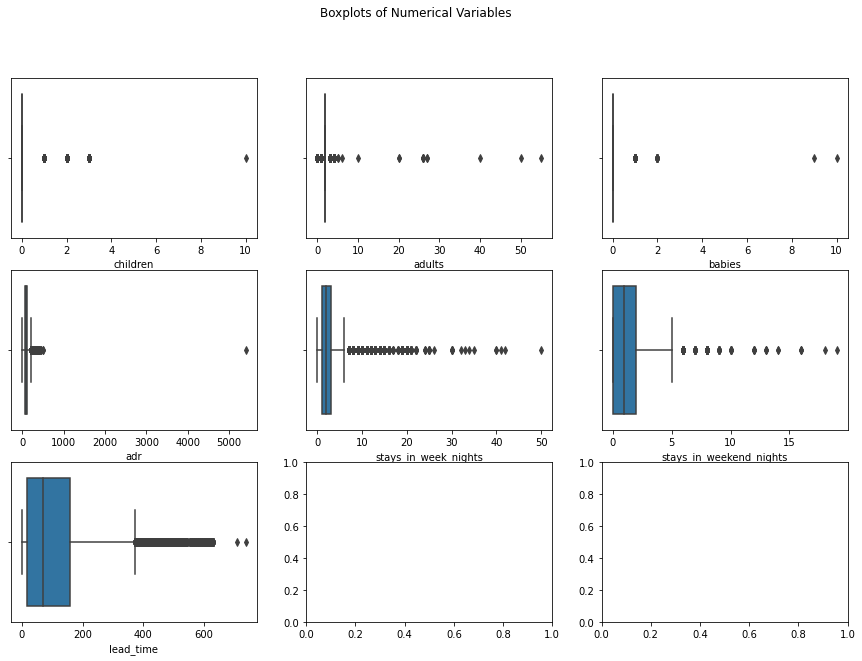

In [12]:
fig,axes=plt.subplots(3,3,figsize=(15,10))
fig.suptitle('Boxplots of Numerical Variables')
sns.boxplot(ax=axes[0,0],x='children',data=data)
sns.boxplot(ax=axes[0,1],x='adults',data=data)
sns.boxplot(ax=axes[0,2],x='babies',data=data)
sns.boxplot(ax=axes[1,0],x='adr',data=data)
sns.boxplot(ax=axes[1,1],x='stays_in_week_nights',data=data)
sns.boxplot(ax=axes[1,2],x='stays_in_weekend_nights',data=data)
sns.boxplot(ax=axes[2,0],x='lead_time',data=data)

### Columns Adr, children, babies, Stays_in_week_nights,  Stays_in_weekend_nights and lead time contains outliers

In [13]:
# Imputing Outliers
data.loc[data['adr']>5000,'adr']=56
data.loc[data['children']>4,'children']=0
data.loc[data['babies']>4,'babies']=0
data.loc[data['stays_in_week_nights']>30,'stays_in_week_nights']=30
data.loc[data['stays_in_weekend_nights']>15,'stays_in_weekend_nights']=15
data.loc[data['lead_time']>600,'lead_time']=600

In [14]:
# Create Copy of the dataset with Selected_columns
df=data[Selected_columns].copy()

# EDA

## Correlation Heat Map

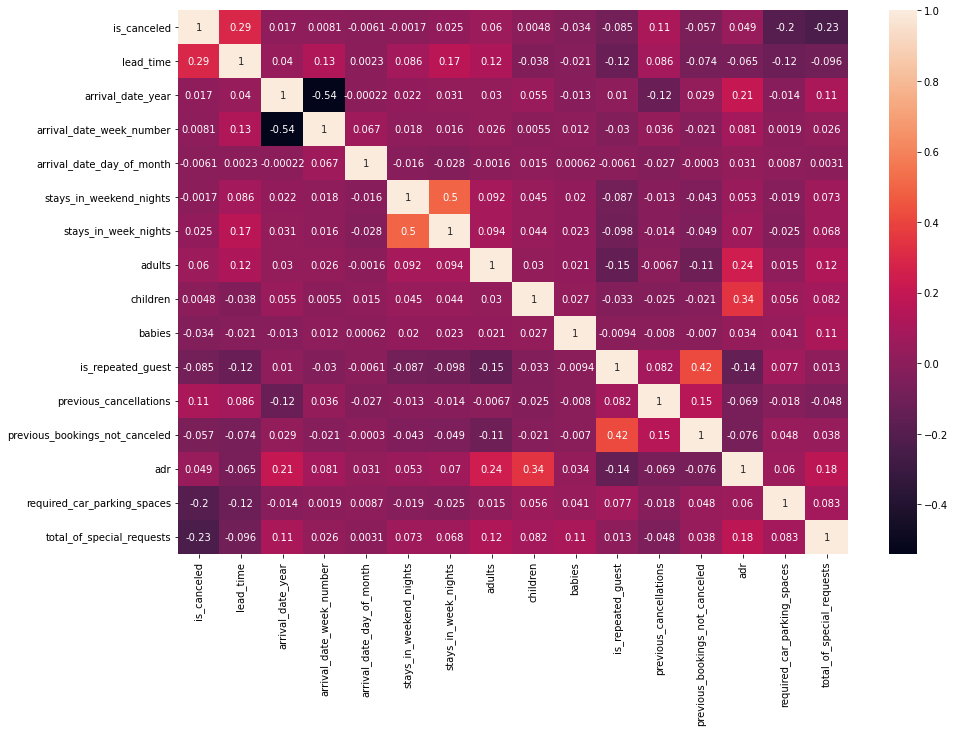

In [15]:
# Plot Correlation heat map to visualize the relationship between the variables
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

### • There is small positive correlation of 32% between adr and children
### • There is positive correlation of 42% between between 'is_repeated' and previous_bookings_not_canceled
### • There is small positive correlation of 29% between lead_time and is_canceled
### • There is positive correlation of 50% between between 'stays_in_weekend_nights' and 'stays_in_week_nights







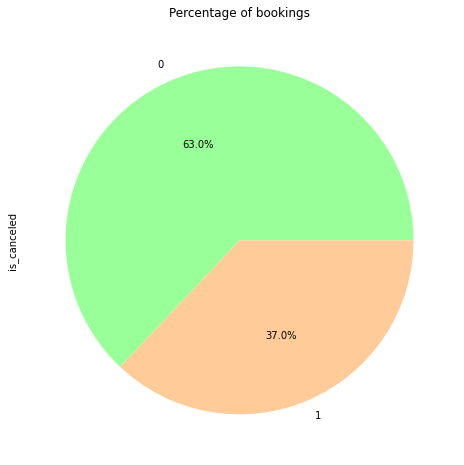

In [16]:
# Used groupby function to count the number of confirmed and cancelled bookings
# Pie plot of confirmed and cancelled bookings 
df.groupby(['is_canceled'])['is_canceled'].count().plot(kind='pie',y='hotel',autopct='%0.1f%%',title='Percentage of bookings',figsize=(12,8),colors=['#99ff99','#ffcc99'])

### • Majority of  bookings were not cancelled but still 37% of bookings were Canceled

## Analysis by Hotel Type

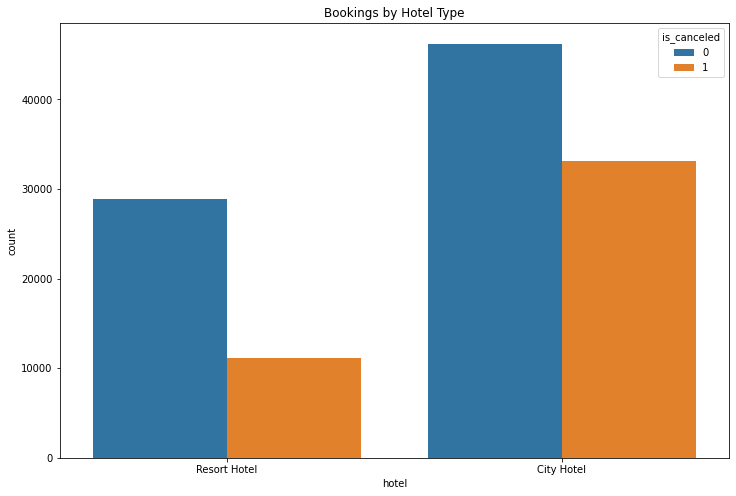

In [17]:
# Plot the Count of Bookings by hotel type using countplot in seaborn
plt.figure(figsize=(12,8))
plt.title('Bookings by Hotel Type')
sns.countplot(x='hotel',hue='is_canceled',data=df)

In [18]:
# Fraction of bookings per hotel type
df['hotel'].value_counts(normalize=True)

City Hotel      0.664461
Resort Hotel    0.335539
Name: hotel, dtype: float64

In [19]:
# Create seperate dataframes for both hotel type
df_r=df[df['hotel']=='Resort Hotel']
df_c=df[df['hotel']=='City Hotel']

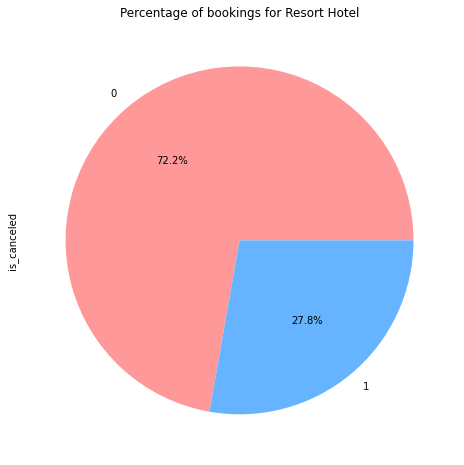

In [20]:
# Plot of Bookings for Resort Hotel
colors=['#ff9999','#66b3ff']
df_r['is_canceled'].value_counts(normalize=True).plot(kind='pie',y='hotel',autopct='%0.1f%%',title='Percentage of bookings for Resort Hotel',figsize=(12,8),colors=colors)

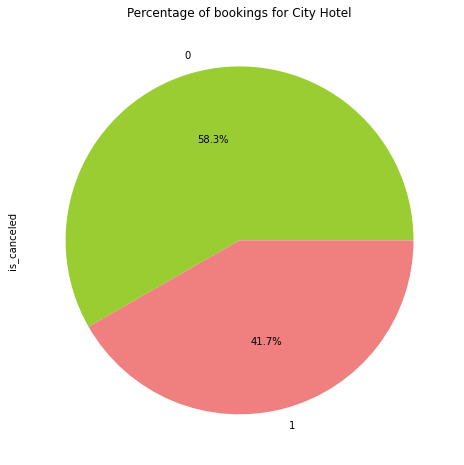

In [21]:
# Plot the percentage of bookings and cancellations for City hotel
colors = ['yellowgreen', 'lightcoral']
df_c['is_canceled'].value_counts(normalize=True).plot(kind='pie',y='hotel',autopct='%0.1f%%',title='Percentage of bookings for City Hotel',figsize=(12,8),colors=colors)

## • Most of the bookings were from city hotel which is about 66%
## • Cancellations in City hotel are more when compared to Resort hotel 

Text(0, 0.5, 'Special_requests')

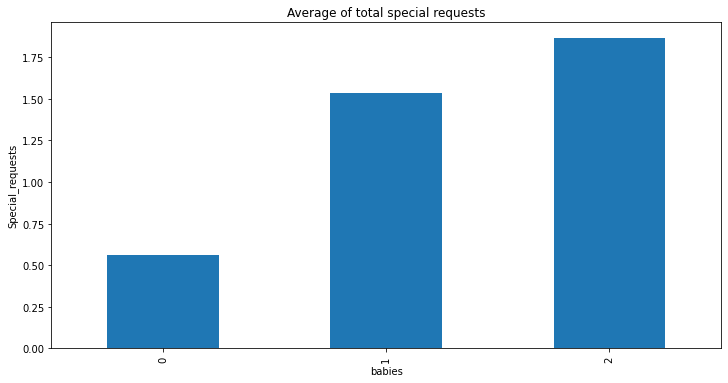

In [22]:
# Average number of special requests
df.groupby(['babies'])['total_of_special_requests'].mean().plot(kind='bar',title='Average of total special requests',figsize=(12,6))
plt.ylabel('Special_requests')

### On a average the number of special requests are slightly more for resort hotel compred to city hotel  and we can see that guest with babies are highly likely to make special requests

# Analyze bookings Country wise

In [23]:
# Create a DataFrame for Confirmed Bookings
bookings_confirmed=df[df['is_canceled']==0]

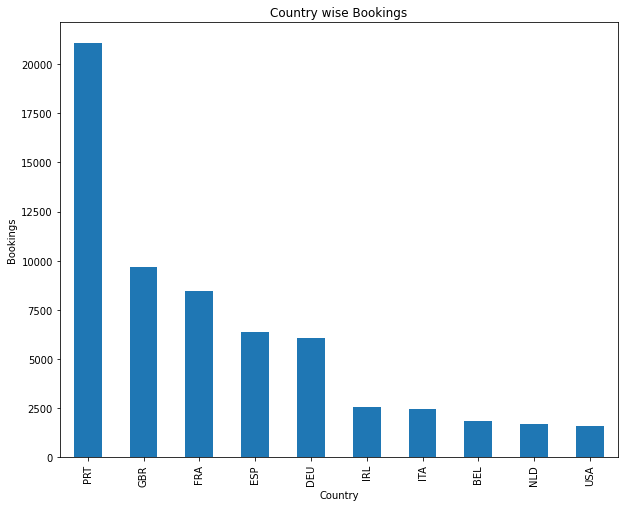

In [24]:
# Top 10 countries with most number of boookings
s=bookings_confirmed['country'].value_counts().head(10)
s.plot(kind='bar',figsize=(10,8),title='Country wise Bookings')
plt.xlabel('Country')
plt.ylabel('Bookings')
plt.show()

In [25]:
# Create dataframes for each year
b_2015=bookings_confirmed[bookings_confirmed['arrival_date_year']==2015]
b_2016=bookings_confirmed[bookings_confirmed['arrival_date_year']==2016]
b_2017=bookings_confirmed[bookings_confirmed['arrival_date_year']==2017]

Text(0, 0.5, 'Bookings')

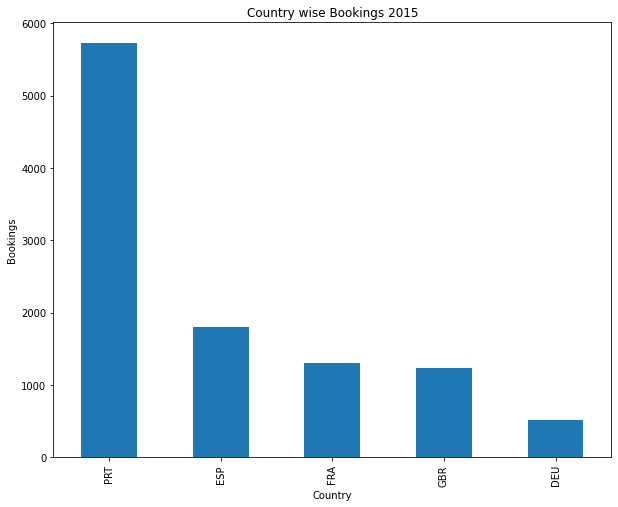

In [26]:
# Plot Count of bookings for 2015
b_2015['country'].value_counts().head().plot(kind='bar',figsize=(10,8),title='Country wise Bookings 2015')
plt.xlabel('Country')
plt.ylabel('Bookings')

Text(0, 0.5, 'Bookings')

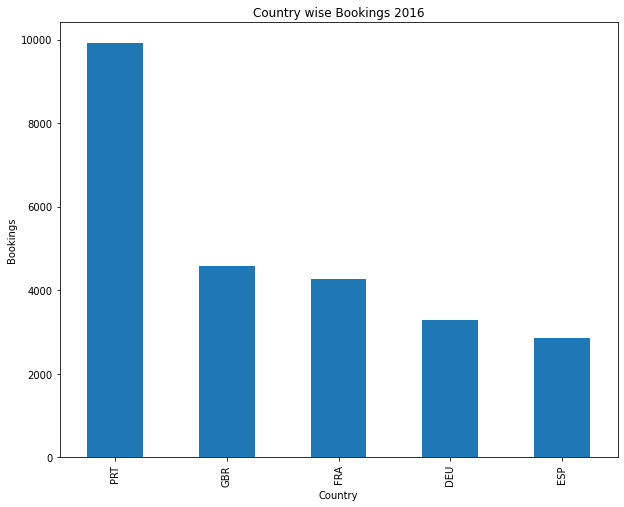

In [27]:
# Plot Count of bookings for 2016
b_2016['country'].value_counts().head().plot(kind='bar',figsize=(10,8),title='Country wise Bookings 2016')
plt.xlabel('Country')
plt.ylabel('Bookings')

Text(0, 0.5, 'Bookings')

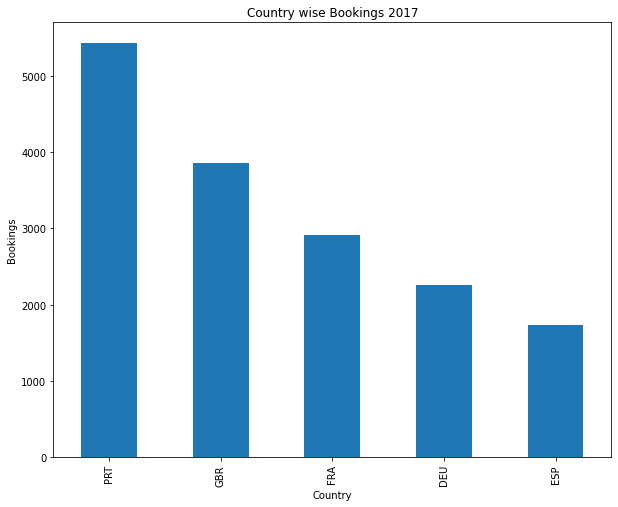

In [28]:
# Plot Count of bookings for 2017
b_2017['country'].value_counts().head().plot(kind='bar',figsize=(10,8),title='Country wise Bookings 2017')
plt.xlabel('Country')
plt.ylabel('Bookings')

In [29]:
# Top 5 countries with least bookings
bookings_confirmed['country'].value_counts().tail(5)

BHR    1
DJI    1
MLI    1
NPL    1
FRO    1
Name: country, dtype: int64

### • Most of the bookings are from Portugal with 40% of the total bookings followed by Great Britain(10%) and France (8%)

## Lets Analyse the Confirmed_bookings

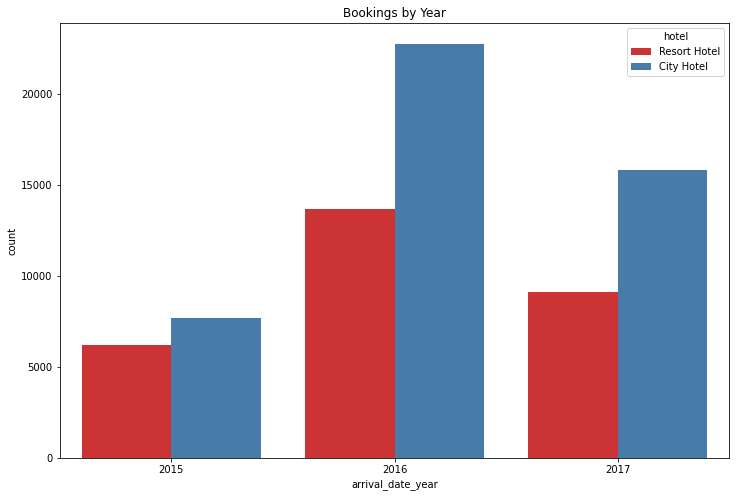

In [30]:
# Plot of Yearly Bookings
plt.figure(figsize=(12,8))
plt.title('Bookings by Year')
sns.countplot(x='arrival_date_year',data=bookings_confirmed,hue='hotel',palette='Set1')

## Number of Bookings for City Hotel is more when compared to Resort Hotel over the years and do not increase constantly over the years

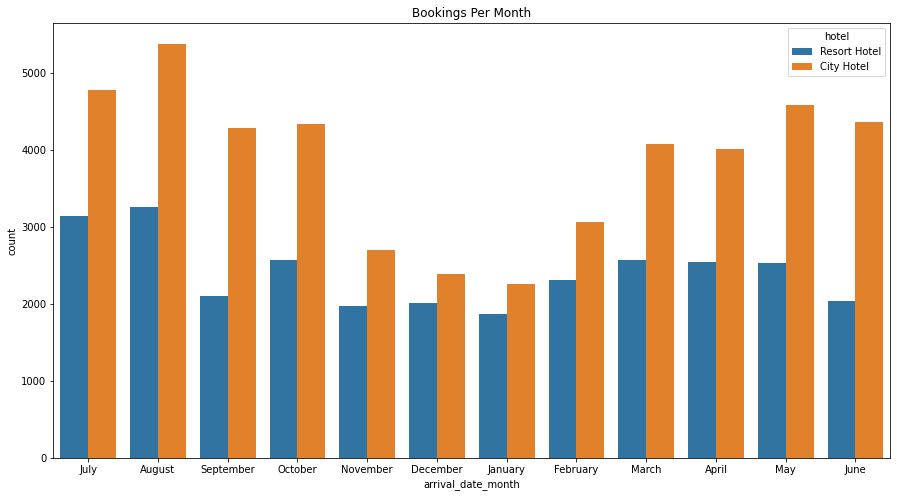

In [31]:
# Plot of Monthly bookings
plt.figure(figsize=(15,8))
plt.title('Bookings Per Month')
sns.countplot(x='arrival_date_month',data=bookings_confirmed,hue='hotel')

In [32]:
# Fraction of bookings per month 
bookings_confirmed['arrival_date_month'].value_counts(normalize=True)

August       0.114919
July         0.105353
May          0.094644
October      0.091983
March        0.088404
April        0.087340
June         0.085198
September    0.085038
February     0.071468
November     0.062156
December     0.058657
January      0.054839
Name: arrival_date_month, dtype: float64

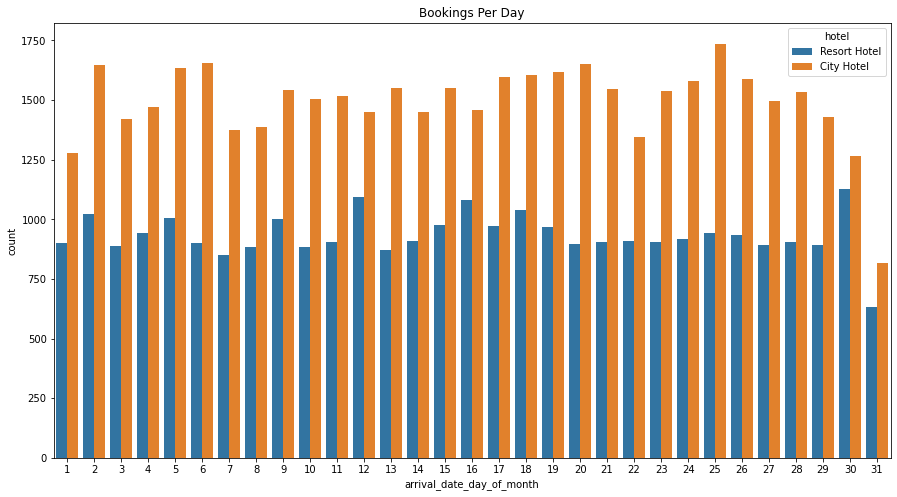

In [33]:
# Plot of Day wise bookings
plt.figure(figsize=(15,8))
plt.title('Bookings Per Day')
sns.countplot(x='arrival_date_day_of_month',data=bookings_confirmed,hue='hotel')

## • Most of the bookings are from May , June ,July and August 
## • August is the busiest month of the year 
## • Bookings are low for November ,December and January
## • Bookings are low at the month ends

Text(0.5, 0, 'Customer type')

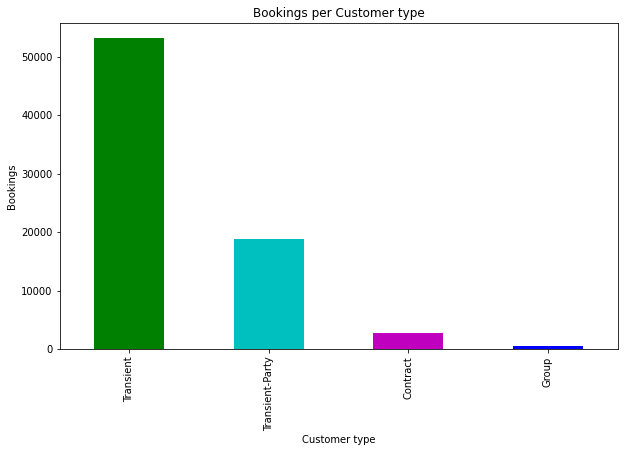

In [34]:
# Plot count of bookings per customer type
bookings_confirmed['customer_type'].value_counts().plot(kind='bar',title='Bookings per Customer type',figsize=(10,6),color=['g','c','m','b'])
plt.ylabel('Bookings')
plt.xlabel('Customer type')

In [35]:
# Fraction of boookings per customer type
df['customer_type'].value_counts(normalize=True)

Transient          0.750591
Transient-Party    0.210436
Contract           0.034140
Group              0.004833
Name: customer_type, dtype: float64

In [67]:
# Create a dictionary with month names as keys and month number as values
d = {'January':'1', 'February':'2', 'March':'3', 'April':'4','May':'5','June' :'6' ,'July':'7','August':'8','September':'9','October':'10','November':'11','December':'12'}
# convert month name to month number using map function
bookings_confirmed['arrival_month']=bookings_confirmed['arrival_date_month'].map(d)

In [68]:
# Concatenate the columns year,month and day to convert into 'yyyy-mm-dd' format
bookings_confirmed['arrival_date']=bookings_confirmed['arrival_date_year'].astype(str)+'-'+bookings_confirmed['arrival_month']+'-'+bookings_confirmed['arrival_date_day_of_month'].astype(str)
# Convert string to datetime 
bookings_confirmed['arrival_date']=pd.to_datetime(bookings_confirmed['arrival_date'])
bookings_confirmed['reservation_status_date']=pd.to_datetime(bookings_confirmed['reservation_status_date'])

In [69]:
# create new column named length of stay
# calculate length of stay using reservation_status_date and arrival_date
bookings_confirmed['Length_of_stay']=(bookings_confirmed['reservation_status_date']-bookings_confirmed['arrival_date']).dt.days
bookings_confirmed=bookings_confirmed[bookings_confirmed['Length_of_stay']>0]
bookings_confirmed['Length_of_stay'].head()

2    1
3    1
4    2
5    2
6    2
Name: Length_of_stay, dtype: int64

## Length of Stay vs Average Daily Rate

Text(0, 0.5, 'Adr')

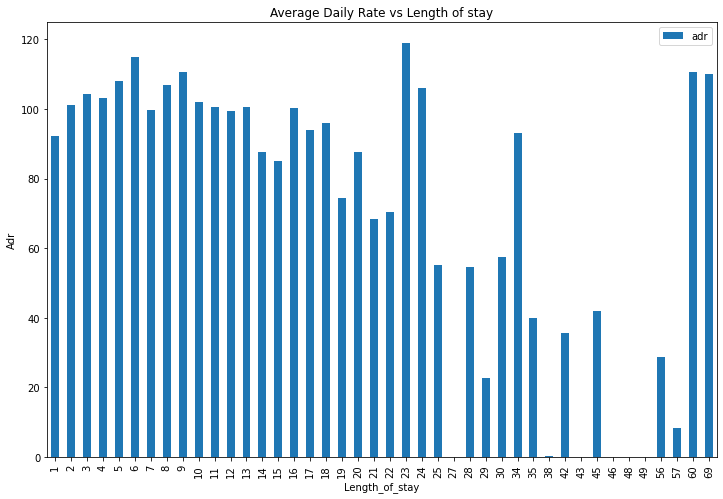

In [39]:
# Plot average daily rate vs Length of stay
bookings_confirmed.groupby('Length_of_stay')[['adr']].mean().plot(kind='bar',figsize=(12,8),title='Average Daily Rate vs Length of stay')
plt.ylabel('Adr')

# Now Lets Analyze Canceled Booking data

In [40]:
# Create Dataframe for Canceled bookings
df1=df[df['is_canceled']==1]

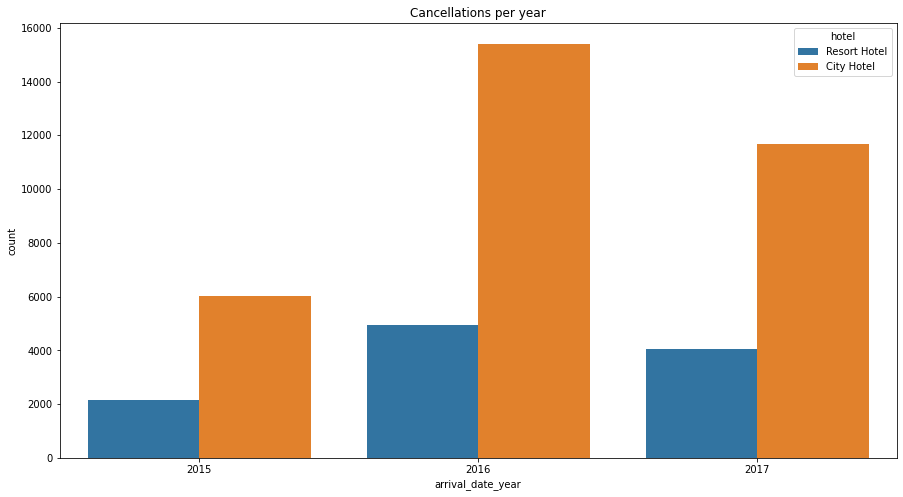

In [41]:
# Canceled Bookings per year
plt.figure(figsize=(15,8))
plt.title('Cancellations per year')
sns.countplot(x='arrival_date_year',data=df1,hue='hotel')

In [42]:
# Total count of bookings per year and hotel type
Total_bookings=df.groupby(['arrival_date_year','hotel'])[['is_canceled']].count()

In [43]:
# Total count of cancelled bookings per year and hotel type
cancellations=df1.groupby(['arrival_date_year','hotel'])[['is_canceled']].count()

In [44]:
# Percentage cancellations per year and hotel type
t=cancellations/Total_bookings*100
t=t.rename(columns={'is_canceled':'Cancellation_rate'})
t

Cancellation_rate
arrival_date_year hotel                          
2015              City Hotel            43.882473
                  Resort Hotel          25.715660
2016              City Hotel            40.395910
                  Resort Hotel          26.552486
2017              City Hotel            42.500364
                  Resort Hotel          30.761059

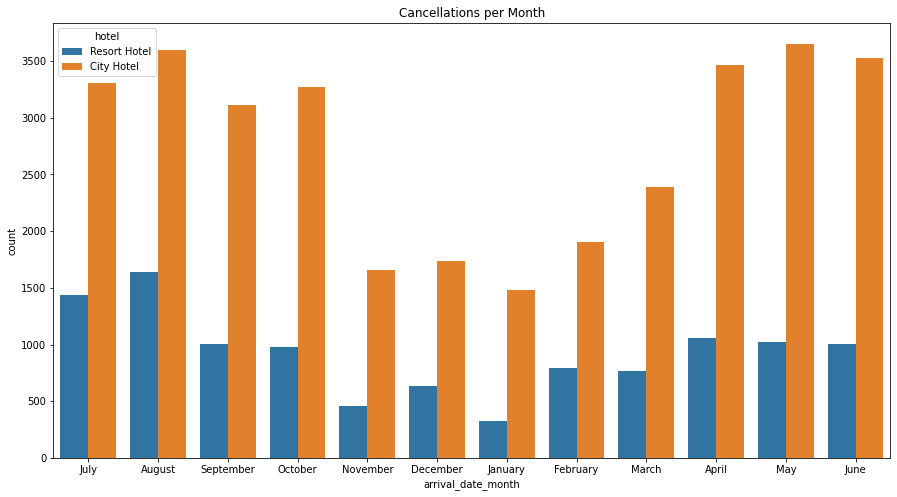

In [45]:
# Canceled bookings per Month
plt.figure(figsize=(15,8))
plt.title('Cancellations per Month')
sns.countplot(x='arrival_date_month',data=df1,hue='hotel')

In [46]:
# Cancellations per month
df1['arrival_date_month'].value_counts().sort_values()

January      1807
November     2122
December     2371
February     2696
March        3149
September    4116
October      4246
April        4524
June         4535
May          4677
July         4742
August       5239
Name: arrival_date_month, dtype: int64

In [47]:
# Total bookings per month
total_bookings=df.groupby(['arrival_date_month'])[['arrival_date_month']].count()



In [48]:
# Total cancellations per month
cancellations=df1.groupby(['arrival_date_month'])[['arrival_date_month']].count()


In [49]:
# Cancellation rate per month
r=cancellations/total_bookings*100
r=r.rename(columns={'arrival_date_month':'Cancellation_rate'})
# sort the values in descending order
r.sort_values(by='Cancellation_rate',ascending=False).head(5)

,Cancellation_rate
arrival_date_month,
June,41.457172
April,40.797186
May,39.665847
September,39.170156
October,38.046595


### • Cancellation are  more in August , July , May and June . May be because of more  number of bookings 

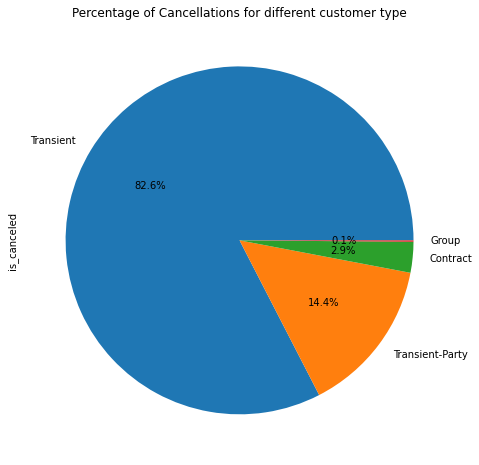

In [50]:
# Percentage of cancellation per customer type
df1.groupby('customer_type')['is_canceled'].count().sort_values(ascending=False).plot(kind='pie',y='hotel',autopct='%0.1f%%',title='Percentage of Cancellations for different customer type',figsize=(12,8))

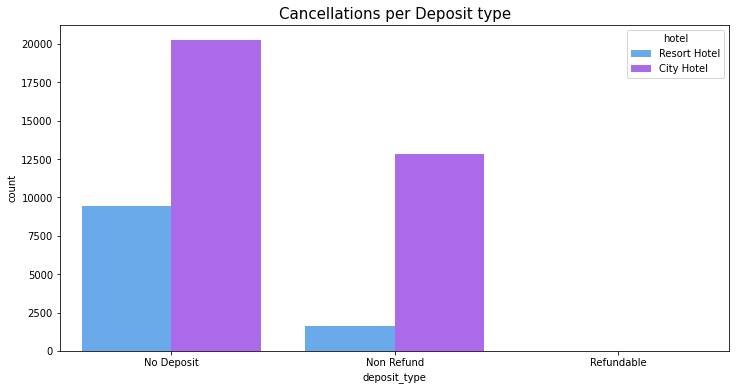

In [51]:
# plot of cancellations per deposit type
plt.figure(figsize=(12, 6))
plt.title('Cancellations per Deposit type',size=15)
sns.countplot(data = df1, x = 'deposit_type',hue='hotel', palette='cool')

### • Most of the Cancellations are from Transient type customers(83%) 
### • 'No Deposit' Bookings have the most number of cancellations

In [52]:
# Previous cancelltion vs cancellations
df1.groupby('previous_cancellations')['is_canceled'].count()

previous_cancellations
0     38282
1      5714
2        38
3        20
4         7
5         2
6         7
11       10
13       11
14       14
19       19
21        1
24       48
25       25
26       26
Name: is_canceled, dtype: int64

### guests with previous cancellation bookings are likely to cancel again
 

# Lets visualise how the ADR (Average Daily Rate) change in the year

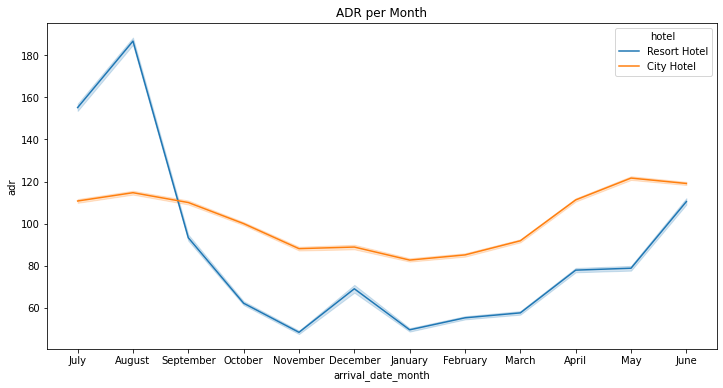

In [53]:
# Plot ADR per Month for both hotel types
plt.figure(figsize=(12,6))
plt.title('ADR per Month')
sns.lineplot(data=df,x='arrival_date_month',y='adr',hue='hotel')

### • Adr is highest in August for Resort hotel and highest for city hotel in May
### • Prices of city hotel do not fluctuate much

Text(0, 0.5, 'Bookings')

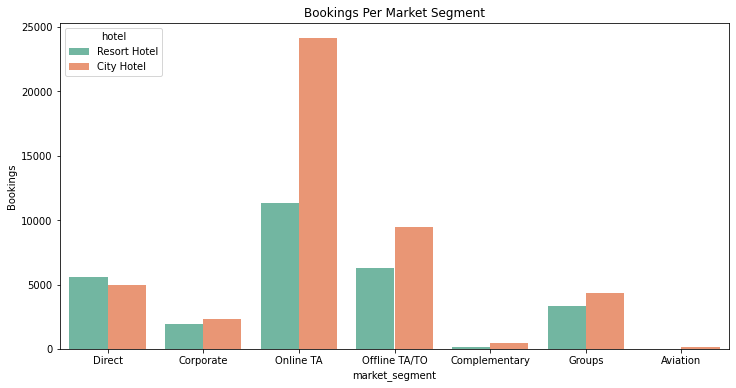

In [54]:
# Bookings by Market segment
plt.figure(figsize=(12,6))
plt.title('Bookings Per Market Segment')
sns.countplot(x='market_segment',data=bookings_confirmed,hue='hotel',palette="Set2")
plt.ylabel('Bookings')

Text(0, 0.5, 'Cancellations')

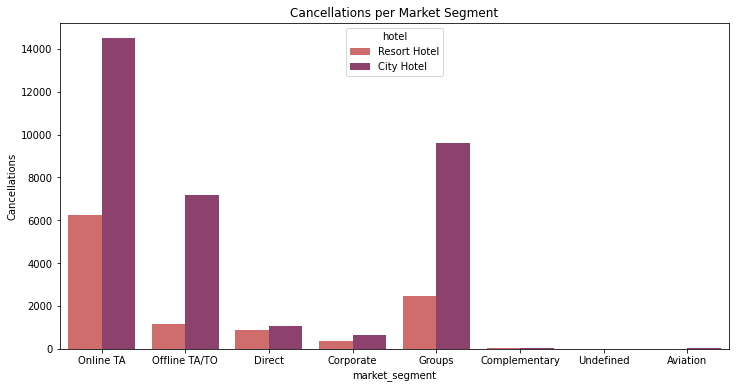

In [55]:
# Cancellation per Market Segment
plt.figure(figsize=(12,6))
plt.title('Cancellations per Market Segment')
sns.countplot(x='market_segment',data=df1,hue='hotel',palette='flare')
plt.ylabel('Cancellations')

### • Most of the bookings are from Online travel agents and offline travel agents about 67% of total bookings
### • Suprisingly Direct bookings for Resort Hotel are more than that of City Hotel

### Compared to resort hotel cancellations are more for city hotel
### For a Number of bookings Cancellations for group type is more 

In [56]:
# Percentage count of different market segments
df['market_segment'].value_counts(normalize=True)

Online TA        0.473046
Offline TA/TO    0.202856
Groups           0.165935
Direct           0.105587
Corporate        0.044350
Complementary    0.006223
Aviation         0.001985
Undefined        0.000017
Name: market_segment, dtype: float64

Text(0, 0.5, 'Bookings')

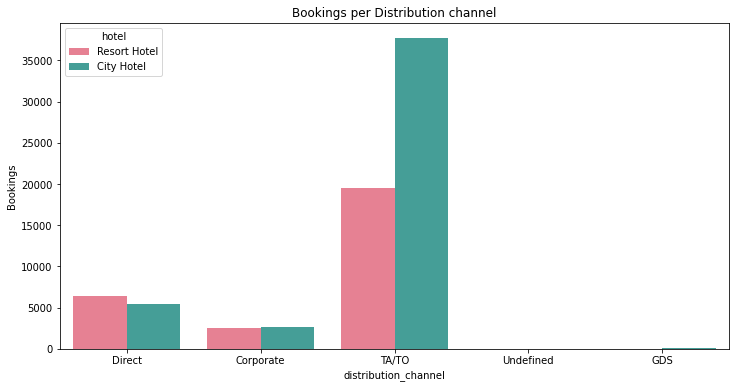

In [57]:
# Plot Bookings per Distribution Channel
plt.figure(figsize=(12,6))
plt.title('Bookings per Distribution channel')
sns.countplot(x='distribution_channel',data=bookings_confirmed,hue='hotel',palette='husl')
plt.ylabel('Bookings')

Text(0, 0.5, 'Cancellations')

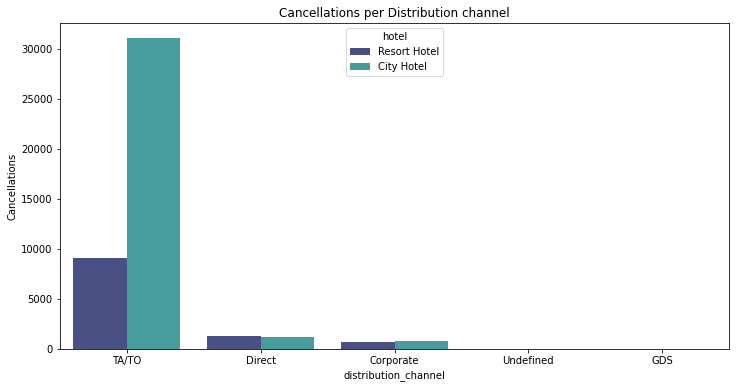

In [58]:
# Cancellation per Distribution Channel
plt.figure(figsize=(12,6))
plt.title('Cancellations per Distribution channel')
sns.countplot(x='distribution_channel',data=df1,hue='hotel',palette='mako')
plt.ylabel('Cancellations')

### Majority of Distribution channel and market segment were online/offline Travel Agencies

Text(0.5, 1.0, 'Reserved_room_type')

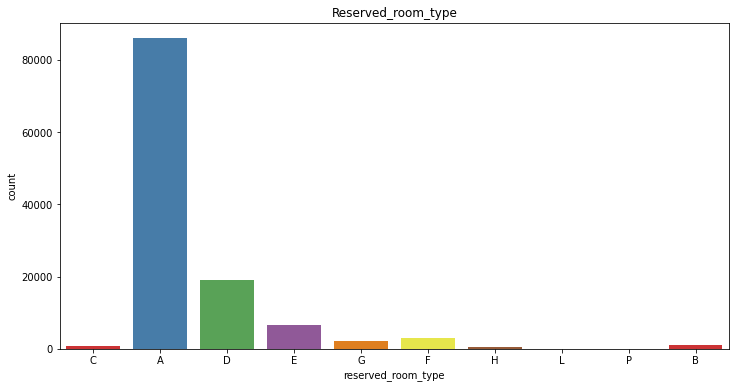

In [59]:
# Plot the count of bookings for each room type
plt.figure(figsize=(12,6))
sns.countplot(data=data,x='reserved_room_type',palette='Set1')
plt.title('Reserved_room_type')

### Most of  the bookings prefer room type "A"

Text(0, 0.5, 'Guests')

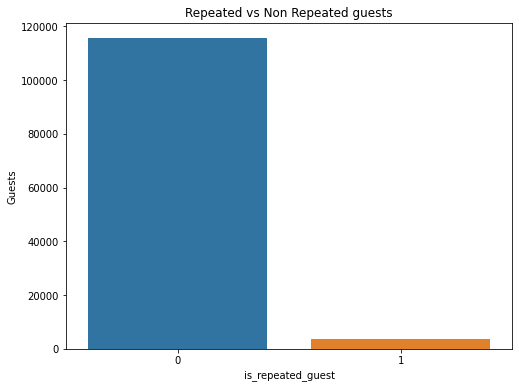

In [60]:
# Plot count of repeated and non-repeated guest
plt.figure(figsize=(8,6))
sns.countplot(x='is_repeated_guest',data=df)
plt.title('Repeated vs Non Repeated guests')
plt.ylabel('Guests')

In [61]:
# percentage of repeating and non repeating guests
df['is_repeated_guest'].value_counts(normalize=True)

0    0.968088
1    0.031912
Name: is_repeated_guest, dtype: float64

### Very Less number(3%)  of repeated guests

Text(0, 0.5, 'Bookings')

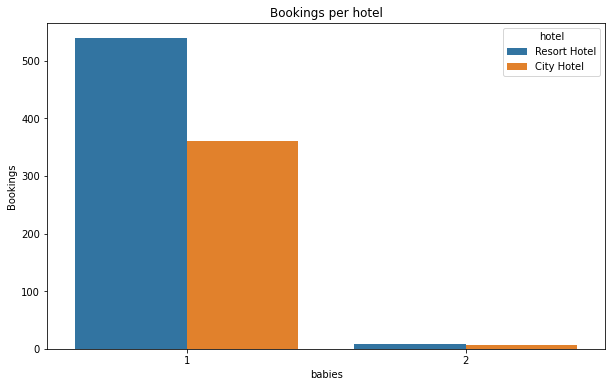

In [62]:
# Count of bookings with babies vs hotel type
d=df[df['babies']>=1]
plt.figure(figsize=(10,6))
plt.title('Bookings per hotel')
sns.countplot(x='babies',hue='hotel',data=d)
plt.ylabel('Bookings')


### In most of the bookings People prefer Resort hotel when they are carrying babies

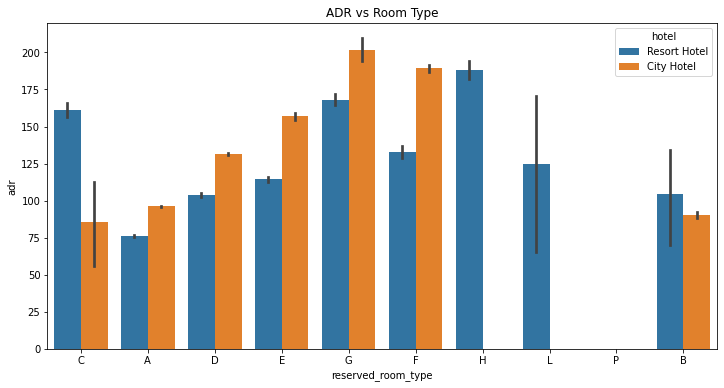

In [63]:
# Plot ADR vs Room type
plt.figure(figsize=(12,6))
plt.title('ADR vs Room Type')
sns.barplot(y='adr',x='reserved_room_type',hue='hotel',data=df)

### 'G' type room is the costliest room type for city hotel and 'H' typr for Resort hotel 
### Resort hotel with Room type 'C' and 'B' has higher price than city hotel

Text(0, 0.5, 'Cancellations')

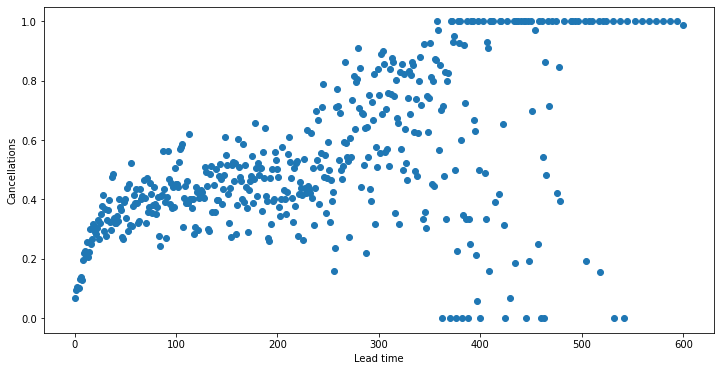

In [64]:
# Plot Lead_time vs is_cancelled
a=df.groupby('lead_time')['is_canceled'].describe()
plt.figure(figsize=(12,6))
plt.scatter(a.index,a['mean'])
plt.xlabel('Lead time')
plt.ylabel('Cancellations')

### From the above scatter plot we can see that there is a small positive correlation between lead_time and cancellation which we have observed in the correlation heatmap before

# Inferences and Conclusions

## • Most of the Bookings are for City hotel about(67%) and Majority of the bookings are from Portugal,Great britian and France and out of    all the bookings 37% of the bookings were cancelled 
## • The higher the lead time there is more chance for cancellation and those guests who have cancelled previous booking are likely to cancel again
## • City hotel have higher cancellation rate than Resort hotel and 'No deposit' bookings leads to higher cancellation rate
## • City hotel has more number of booking during May to August, when the prices are also highest. From november to january both the hotels have less visitors, although prices are lower. Customer may get discounts on bookings in these months
## • Majority of the bookings are from Online/offline Travel Agents and Direct bookings have less cancellation rate when compared to all other bookings
## • Cancellations are high when the bookings are done through online agent compared to direct bookings
## • Finally the number of repeated guest is very low. To increase repeated guests one can provide discount coupons/cashback offers after the booking is completed
